In [1]:
# imports
import numpy as np
import pandas as pd
import os, sys, pdb, pytz
import matplotlib.pyplot as plt
%matplotlib inline

# astropy 
import astropy.units as u
from astropy.time import Time
from astropy.table import QTable
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord

In [2]:
# GBT information 
beamLabel = ["L","S","C","X"]
upp = [1.73, 2.60, 7.8, 11.6]
low = [1.15, 1.73, 3.95, 7.8]
beams = [12.6/x for x in upp]
beamdeg =[x/60.0 for x in beams]
beamDict = dict(zip(beamLabel, beamdeg))
freqDict = dict(zip(beamLabel, upp))

In [3]:
# set the data directory
datdir = os.path.realpath('__file__' + "/../data/") + "/"
if not os.path.isdir(datdir):
    os.mkdir(datdir)
print("Data directory: " + datdir)

Data directory: /Users/michael/Desktop/seti-fortuitous-obs/data/


In [4]:
# function to fix the arrays that were written as strings
def string_to_array(string_data):
    cleaned_data = string_data.strip('[]\n').split()
    return np.array([float(value) for value in cleaned_data])

In [5]:
# function to read csv and parse appropriate strings as arrays
def read_csv(datfile):
    # set names of columns to fix
    cols_to_fix = ['ra_trans', 'dec_trans', 'sep_trans', \
               'maxdrift_trans', 'ra_rec', 'dec_rec', \
               'sep_rec', 'maxdrift_rec']

    # read the data
    df = pd.read_csv(datfile)
    
    # turn long strings back into arrays
    for col_name in cols_to_fix:
        arr = []
        for i in range(len(df)):
            arr.append(string_to_array(df.loc[i,col_name]))
        df[col_name] = arr
        
    return df

In [6]:
# download the data if they aren't already there
datfile = datdir + "fortuitous.csv"
if not os.path.isfile(datfile):
    print("derp")

# read the file
df = read_csv(datfile)

In [7]:
def format_dec_string(coord):
    fs = 1
    if coord < 0:
        fs = -1
        coord = abs(coord)
    qS = '"'
    return f"{int(fs*float(int(coord)))}$^\circ$ {int((coord - float(int(coord))) // (1/60))}' {np.around((coord - float(int(coord)) - ((coord - float(int(coord))) // (1/60))*(1/60))/(1/(60*60)),3)}{qS} "

def format_ra_string(coord):
    return f"{int(coord // 15)}h {int((coord - (coord // 15)*15) // 0.25)}m {np.around((coord - (coord // 15)*15 - ((coord - (coord // 15)*15) // 0.25)*0.25)/(360/(24*60*60)),3)}s"

In [16]:
# define function to plot focal lines on sky
def plot_probe_focal_lines(i):
    ra_trans = df.iloc[i].ra_trans
    dec_trans = df.iloc[i].dec_trans

    ra_rec = df.iloc[i].ra_rec
    dec_rec = df.iloc[i].dec_rec

    ra_obs = df.iloc[i].ra_obs
    dec_obs = df.iloc[i].dec_obs
    band = df.iloc[i].obs_band

    # make plot objects
    fig = plt.figure(figsize=(10,10))
    axs = fig.add_subplot(1, 1, 1)

    # plot focal lines for transmitter and receiver
    axs.plot(ra_trans, dec_trans, color="tab:blue", label="Transmitter")
    axs.plot(ra_rec, dec_rec, color="tab:orange", label="Receiver")

    # plot the size of the band
    circ = plt.Circle((ra_obs, dec_obs), beamDict[band]/2.0, color='k', fill=False)
    axs.add_patch(circ)

    # inver the RA axis
    axs.invert_xaxis()

    # format the tick marks
    axs.set_xticklabels(map(format_ra_string, axs.get_xticks()), rotation=45, fontsize=12)
    axs.set_yticklabels(map(format_dec_string, axs.get_yticks()), fontsize=12)

    # set the axis labels
    axs.set_xlabel("Right Ascension", fontsize=12)
    axs.set_ylabel("Declination", fontsize=12)

    axs.set_aspect("equal")
    axs.grid(ls="--", alpha=0.5)
    axs.legend(fontsize=12)
    plt.show()

/usr/local/anaconda3/envs/seti/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/anaconda3/envs/seti/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


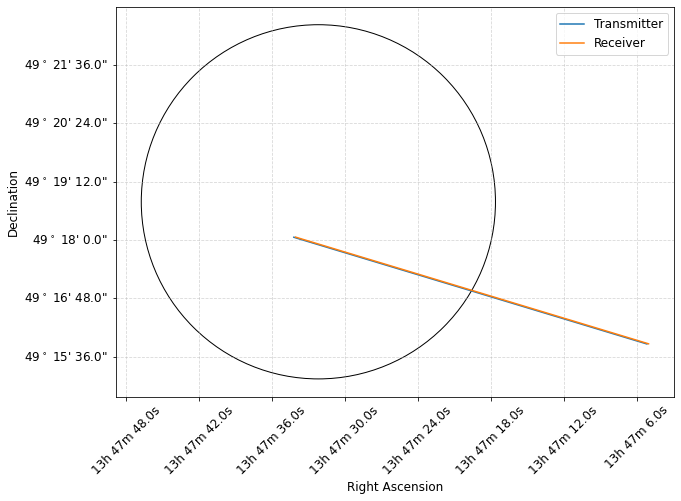

In [17]:
plot_probe_focal_lines(28)

In [19]:
df.gaia_source_id

0     6271993076526910208
1     6271993076526910208
2     6663357780805115904
3     6663357265409042688
4     6663357780805115904
             ...         
65    4918156059829697024
66    4918156059829751808
67    4635422588982399616
68    4635422588982399616
69    4635422588982399616
Name: gaia_source_id, Length: 70, dtype: int64